In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

%matplotlib inline

/home/olga/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Preprocessing

In [12]:
train = pd.read_csv("../data/train.csv")
train.shape

(1460, 81)

In [13]:
encoders = {}
for var_name in train.select_dtypes(include=['object']):
    labelencoder_X = LabelEncoder()
    train[var_name] = labelencoder_X.fit_transform(train[var_name].astype(str))
    encoders[var_name] = labelencoder_X

In [14]:
train = train.fillna(-1)

In [21]:
# scaler = StandardScaler()
scaler = RobustScaler()
scaled_df = scaler.fit_transform(train)

In [22]:
X = scaled_df[:, :-1]
y = scaled_df[:, -1]
y.shape, X.shape

# X = train.loc[:, train.columns != 'SalePrice'].values
# y = train['SalePrice'].values
# y.shape, X.shape

((1460,), (1460, 80))

Training

In [23]:
scores = {}

In [24]:
reg = Ridge()
scores["Ridge"] = cross_val_score(reg, X, y, cv=10)

reg = LinearRegression()
scores["LinearRegression"] = cross_val_score(reg, X, y, cv=10)

reg = Lasso()
scores["Lasso"] = cross_val_score(reg, X, y, cv=10)

reg = DecisionTreeRegressor()
scores["DecisionTreeRegressor"] = cross_val_score(reg, X, y, cv=10)

reg = RandomForestRegressor()
scores["RandomForestRegressor"] = cross_val_score(reg, X, y, cv=10)

reg = KNeighborsRegressor()
scores["KNeighborsRegressor"] = cross_val_score(reg, X, y, cv=10)

In [25]:
for classifier in scores:
    print(classifier, np.mean(scores[classifier]), np.std(scores[classifier]))

Ridge 0.8096307034729604 0.11548649785375396
LinearRegression 0.8023537244759822 0.11967470503525683
Lasso 0.06774785103386968 0.028103617925734674
DecisionTreeRegressor 0.731016005832454 0.10354443996048217
RandomForestRegressor 0.8435923018631281 0.04942239126617921
KNeighborsRegressor 0.5700978483066957 0.09215124001943209


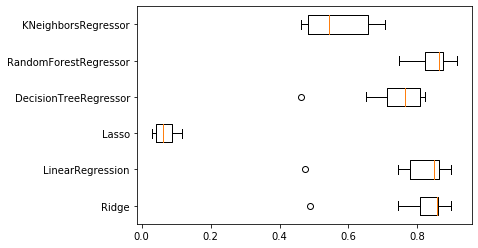

In [26]:
results = [scores[key] for key in scores]
names = [key for key in scores]

plt.boxplot(results, vert=0,labels=names)
plt.show()

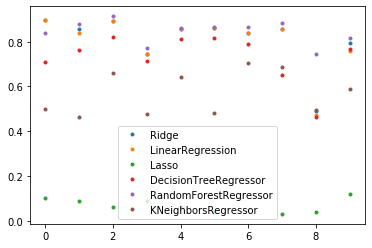

In [27]:
for classifier in scores:
    plt.plot(scores[classifier], '.', label=classifier)
    plt.legend()
